<a href="https://colab.research.google.com/github/PRAVITH10HJ/Logistic-Regression/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.shape

(299, 13)

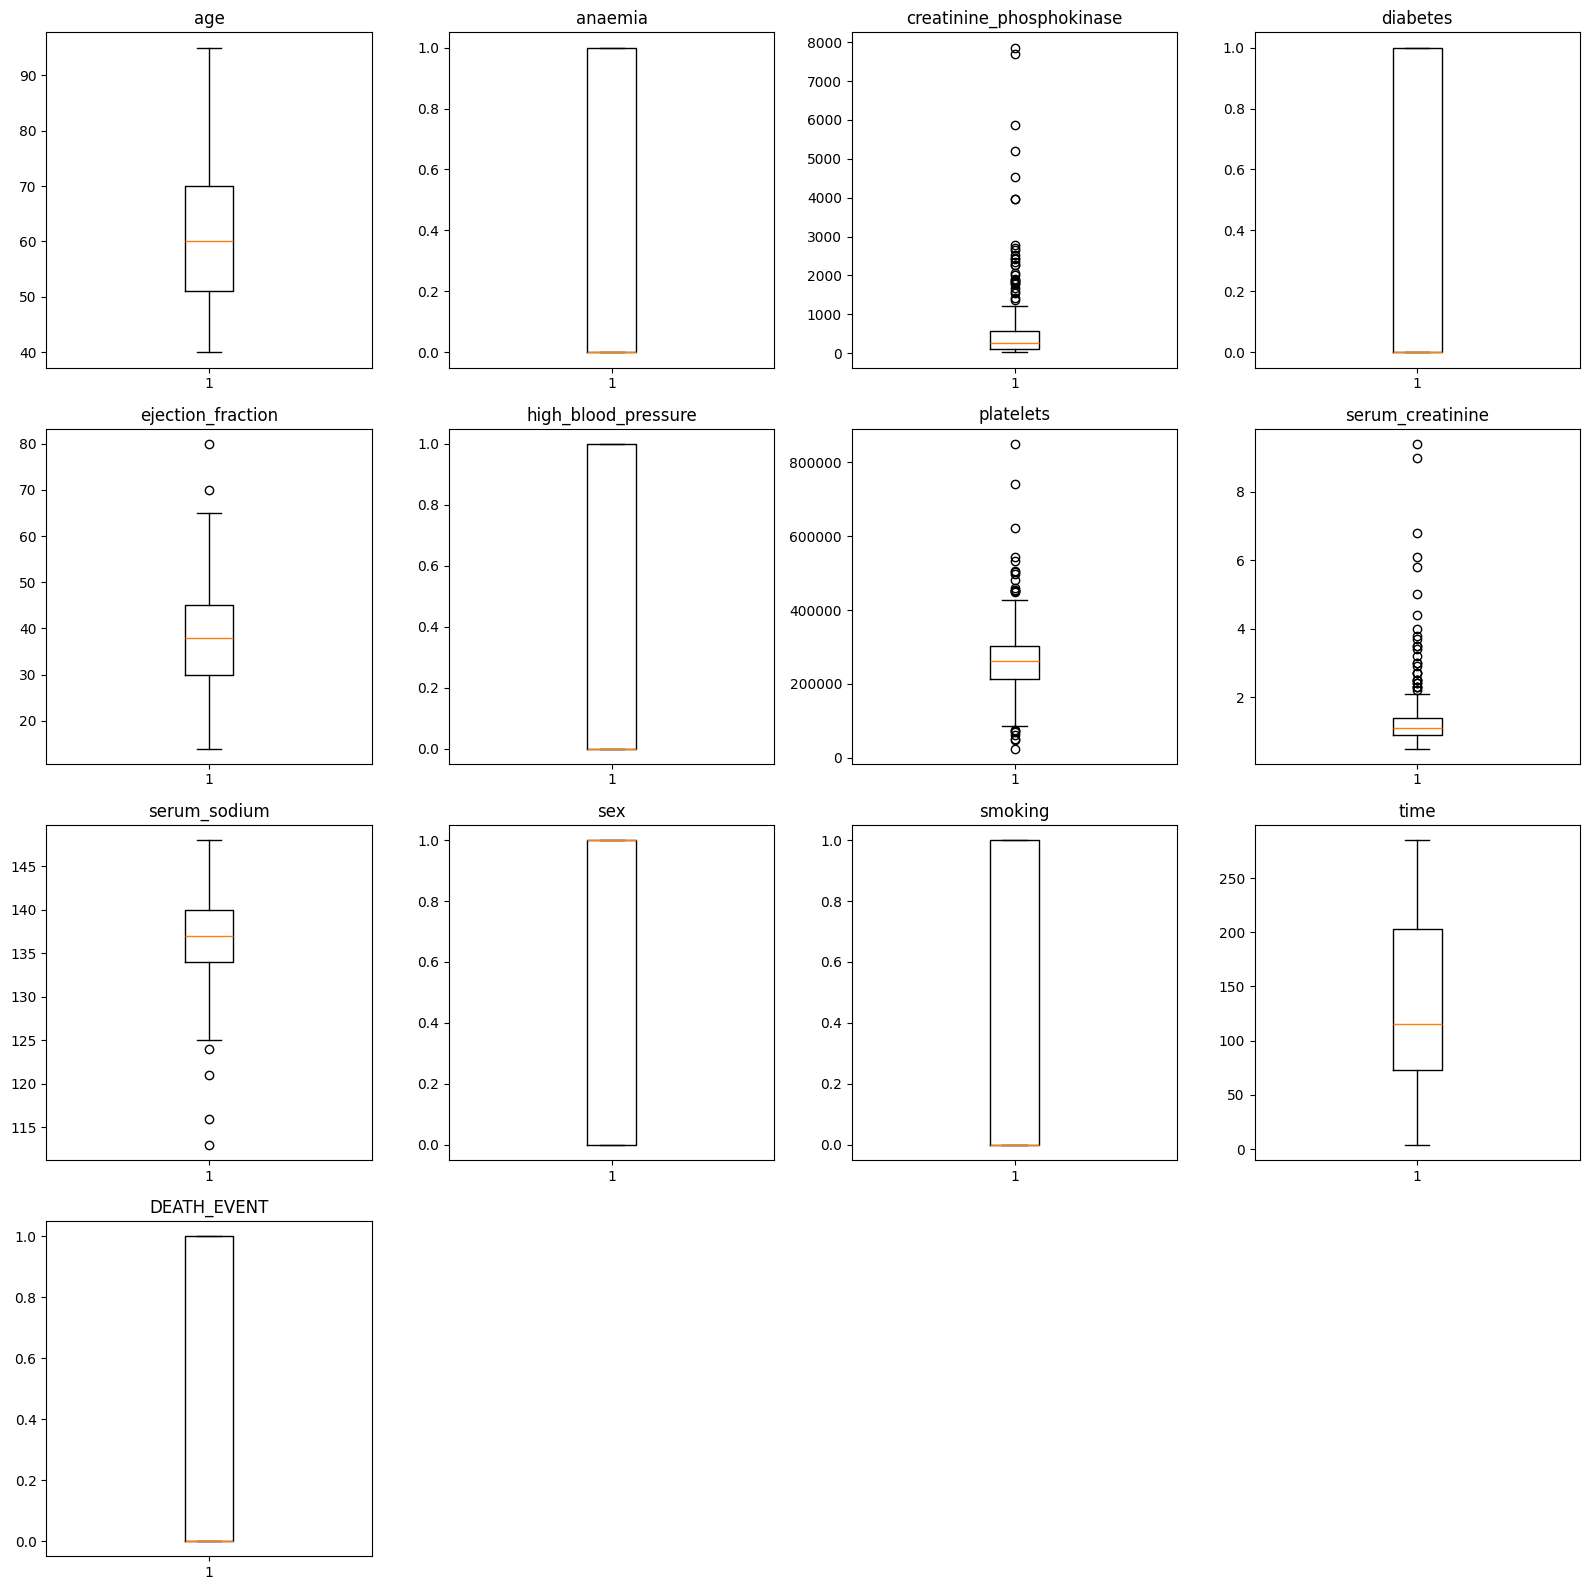

In [ ]:
n_cols = 4
n_rows = (len(df.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 4))

for i, col in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

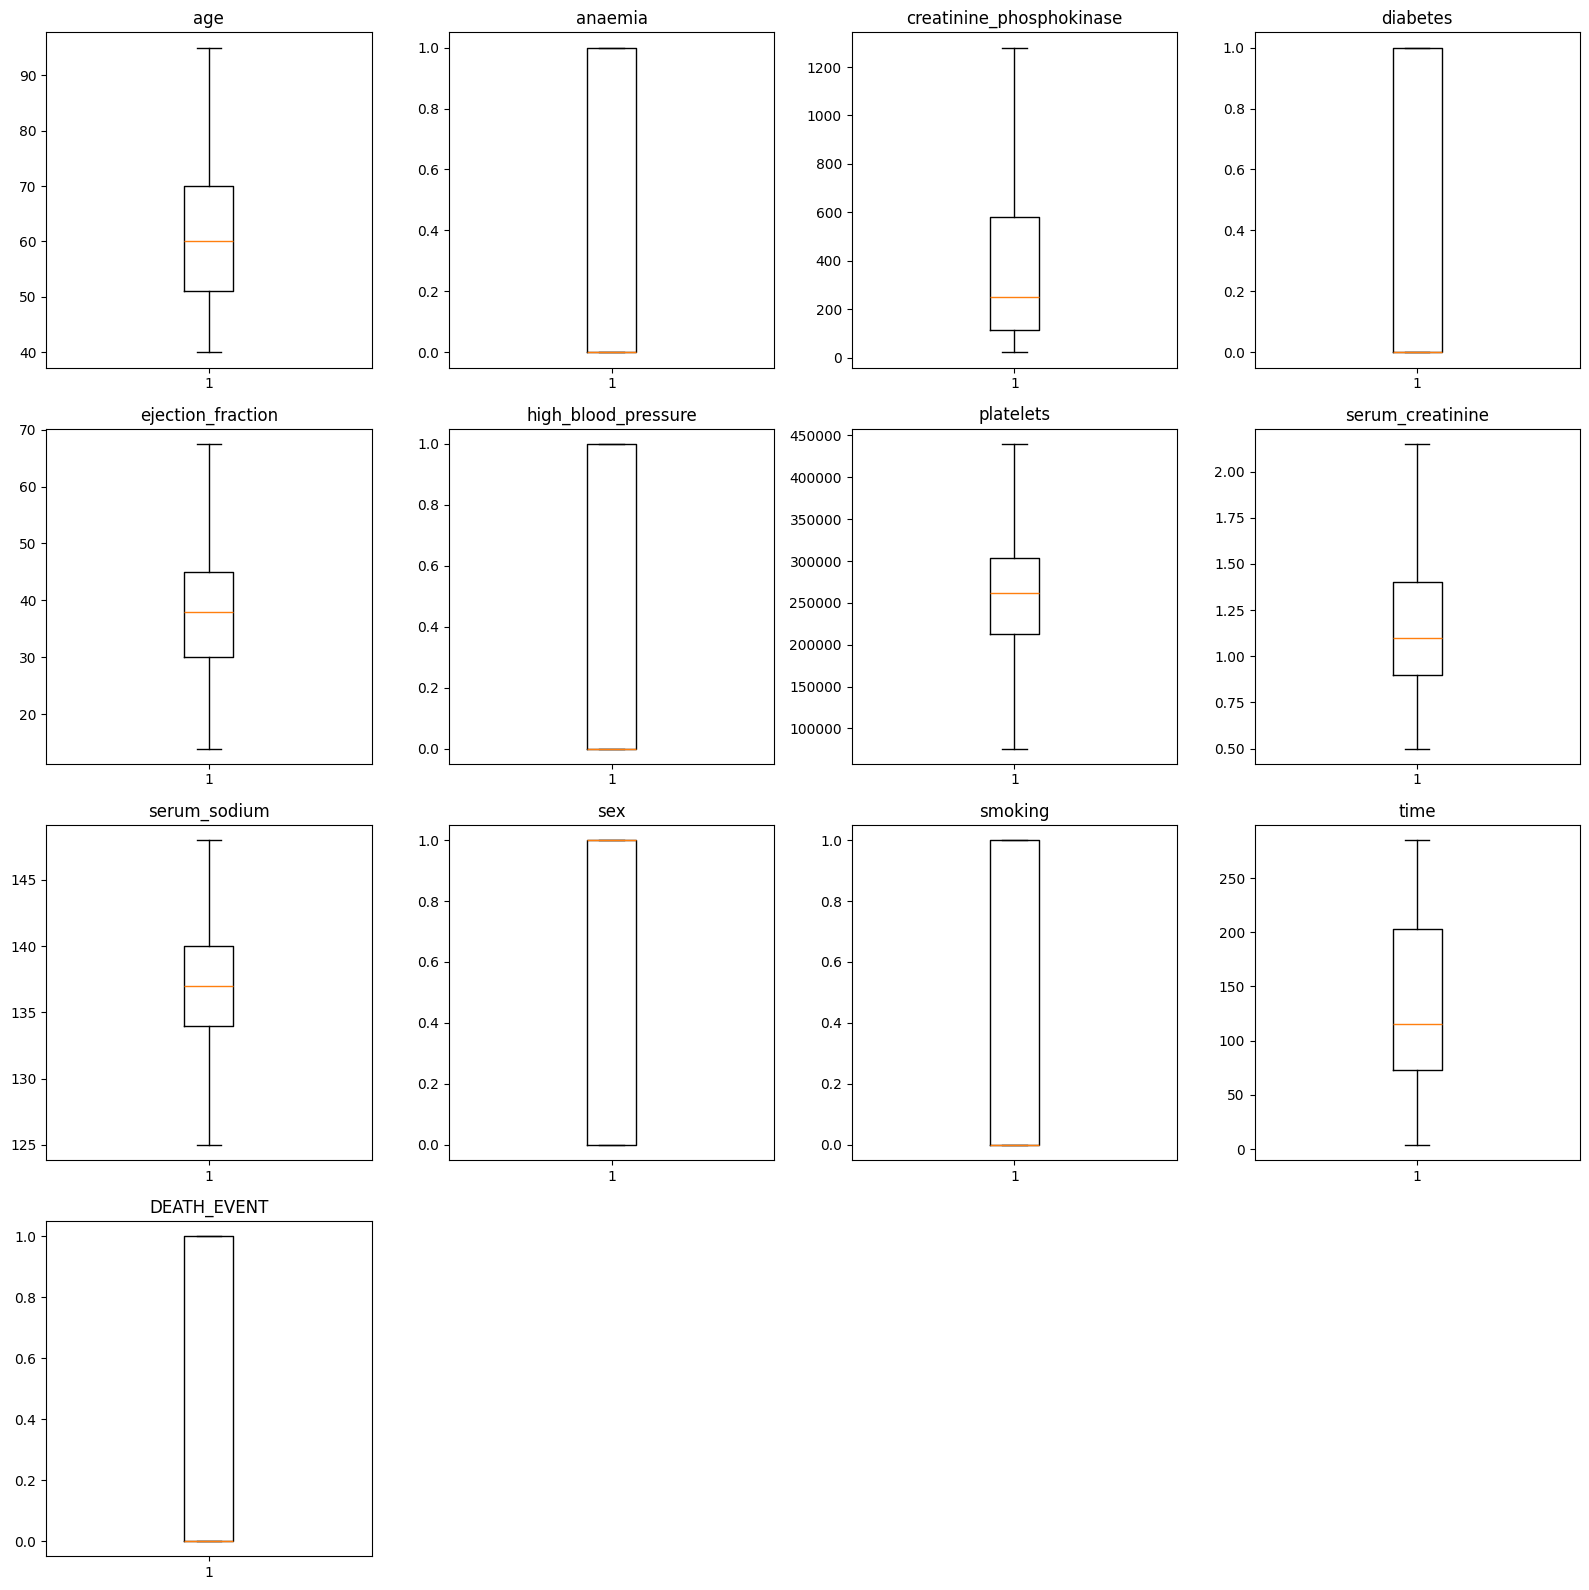

In [ ]:
def remove_outliers(col):
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

l1,u1=remove_outliers(df['creatinine_phosphokinase'])
l2,u2=remove_outliers(df['ejection_fraction'])
l3,u3=remove_outliers(df['serum_creatinine'])
l4,u4=remove_outliers(df['platelets'])
l5,u5=remove_outliers(df['serum_sodium'])

df['creatinine_phosphokinase']=np.where(df['creatinine_phosphokinase']>u1,u1,df['creatinine_phosphokinase'])
df['creatinine_phosphokinase']=np.where(df['creatinine_phosphokinase']<l1,l1,df['creatinine_phosphokinase'])
df['ejection_fraction']=np.where(df['ejection_fraction']>u2,u2,df['ejection_fraction'])
df['ejection_fraction']=np.where(df['ejection_fraction']<l2,l2,df['ejection_fraction'])
df['serum_creatinine']=np.where(df['serum_creatinine']>u3,u3,df['serum_creatinine'])
df['serum_creatinine']=np.where(df['serum_creatinine']<l3,l3,df['serum_creatinine'])
df['platelets']=np.where(df['platelets']>u4,u4,df['platelets'])
df['platelets']=np.where(df['platelets']<l4,l4,df['platelets'])
df['serum_sodium']=np.where(df['serum_sodium']>u5,u5,df['serum_sodium'])
df['serum_sodium']=np.where(df['serum_sodium']<l5,l5,df['serum_sodium'])

n_cols = 4
n_rows = (len(df.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 4))

for i, col in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,424.214883,0.418060,38.033445,0.351171,259163.714883,1.234515,136.712375,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,385.449328,0.494067,11.685643,0.478136,81478.304369,0.440098,4.076971,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,76000.000000,0.500000,125.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.900000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.400000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,1280.250000,1.000000,67.500000,1.000000,440000.000000,2.150000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


<Axes: >

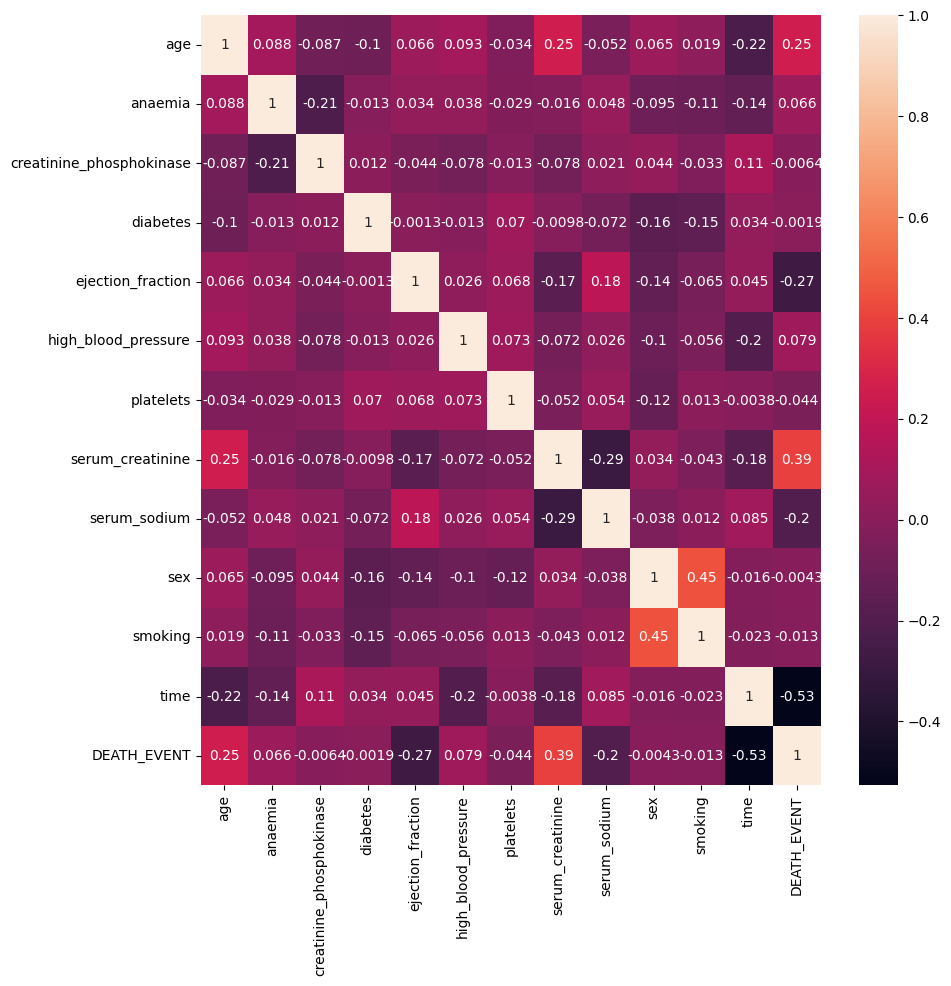

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
x=df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(209, 12)
(90, 12)
(209,)
(90,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear',random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred_test=lr.predict(x_test)
print(y_pred_test)

[0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
lr.predict_proba(x_test)[:,0]

array([0.98406261, 0.89760508, 0.33987199, 0.9602161 , 0.87531793,
       0.89774423, 0.49409352, 0.96348248, 0.52442923, 0.56380021,
       0.90972713, 0.26423521, 0.82471337, 0.92398947, 0.4286072 ,
       0.17464249, 0.98704902, 0.733827  , 0.96534551, 0.97717812,
       0.50153412, 0.74082982, 0.48725849, 0.67703436, 0.53839258,
       0.93243878, 0.83982683, 0.98645355, 0.99216495, 0.9286229 ,
       0.93439437, 0.19797315, 0.6072352 , 0.7419794 , 0.97887487,
       0.45835541, 0.75386925, 0.64230562, 0.99523848, 0.04170985,
       0.98991803, 0.70973027, 0.74407391, 0.75061222, 0.039435  ,
       0.82714141, 0.98171804, 0.93696299, 0.63488403, 0.29355042,
       0.6953457 , 0.98075834, 0.87177022, 0.82150034, 0.13797795,
       0.66529079, 0.76258732, 0.11821087, 0.9671913 , 0.73595361,
       0.36094133, 0.8967265 , 0.86608593, 0.99273742, 0.99648631,
       0.98380339, 0.94718712, 0.71420263, 0.1126826 , 0.30625944,
       0.71359135, 0.8552469 , 0.93885075, 0.41456634, 0.30947

In [ ]:
lr.predict_proba(x_test)[:,1]

array([0.01593739, 0.10239492, 0.66012801, 0.0397839 , 0.12468207,
       0.10225577, 0.50590648, 0.03651752, 0.47557077, 0.43619979,
       0.09027287, 0.73576479, 0.17528663, 0.07601053, 0.5713928 ,
       0.82535751, 0.01295098, 0.266173  , 0.03465449, 0.02282188,
       0.49846588, 0.25917018, 0.51274151, 0.32296564, 0.46160742,
       0.06756122, 0.16017317, 0.01354645, 0.00783505, 0.0713771 ,
       0.06560563, 0.80202685, 0.3927648 , 0.2580206 , 0.02112513,
       0.54164459, 0.24613075, 0.35769438, 0.00476152, 0.95829015,
       0.01008197, 0.29026973, 0.25592609, 0.24938778, 0.960565  ,
       0.17285859, 0.01828196, 0.06303701, 0.36511597, 0.70644958,
       0.3046543 , 0.01924166, 0.12822978, 0.17849966, 0.86202205,
       0.33470921, 0.23741268, 0.88178913, 0.0328087 , 0.26404639,
       0.63905867, 0.1032735 , 0.13391407, 0.00726258, 0.00351369,
       0.01619661, 0.05281288, 0.28579737, 0.8873174 , 0.69374056,
       0.28640865, 0.1447531 , 0.06114925, 0.58543366, 0.69052

In [ ]:
from sklearn.metrics import accuracy_score
print("model accuracy is",accuracy_score(y_test,y_pred_test))

model accuracy is 0.8333333333333334


In [ ]:
y_pred_train=lr.predict(x_train)
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

Overfitting or Underfitting

In [ ]:

print('training score is',lr.score(x_train,y_train))
print('testing score is',lr.score(x_test,y_test))

training score is 0.861244019138756
testing score is 0.8333333333333334


In [ ]:
lr1=LogisticRegression(solver='liblinear',random_state=0,C=0.01)
lr1.fit(x_train,y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [ ]:
print('training score',lr1.score(x_train,y_train))
print('testing score',lr1.score(x_test,y_test))

training score 0.8181818181818182
testing score 0.8555555555555555


In [ ]:
y_test.value_counts()

,count
DEATH_EVENT,
0,62
1,28


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_test)
print("COnfusion Matrix is\n\n",cm)
print('\n True Positive is ',cm[0][0])
print('\n True Negative is ',cm[1][1])
print('\n False Positive is ',cm[0][1])
print('\n False Negative is ',cm[1][0])


COnfusion Matrix is

 [[59  3]
 [12 16]]

 True Positive is  59

 True Negative is  16

 False Positive is  3

 False Negative is  12


<Axes: >

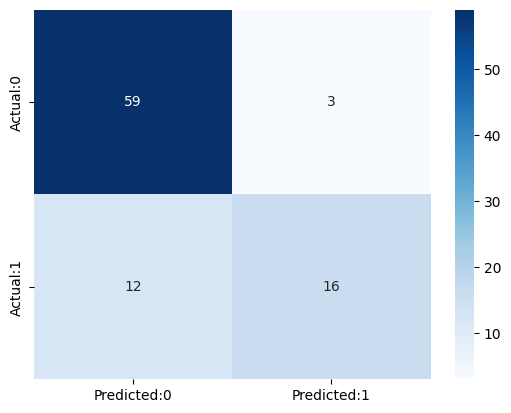

In [ ]:
cm_mat=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(cm_mat,annot=True,fmt='d',cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        62
           1       0.84      0.57      0.68        28

    accuracy                           0.83        90
   macro avg       0.84      0.76      0.78        90
weighted avg       0.83      0.83      0.82        90



In [ ]:
tp=cm[0][0]
tn=cm[1][1]
fp=cm[0][1]
fn=cm[1][0]

In [ ]:
classification_accuracy=(tp+tn)/(tp+tn+fp+fn)
print('classification accuracy is',classification_accuracy)

classification accuracy is 0.8333333333333334


In [ ]:
classifcation_error=(fp+fn)/(tp+tn+fp+fn)
print('classification error is',classifcation_error)

classification error is 0.16666666666666666


In [ ]:
precision=tp/(tp+fp)
print('precision is',precision)

precision is 0.9516129032258065


In [ ]:
sensitivity=tp/(tp+fn)
print('sensitivity is',sensitivity)

sensitivity is 0.8309859154929577


In [ ]:
specificity=tn/(tn+fp)
print('specificity is',specificity)

specificity is 0.8421052631578947


In [ ]:
neg_perd_value=tn/(tn+fn)
print('negative predictive value is',neg_perd_value)

negative predictive value is 0.5714285714285714


In [ ]:
y_pred_prob=lr.predict_proba(x_test)[0:10]
y_pred_prob

array([[0.98406261, 0.01593739],
       [0.89760508, 0.10239492],
       [0.33987199, 0.66012801],
       [0.9602161 , 0.0397839 ],
       [0.87531793, 0.12468207],
       [0.89774423, 0.10225577],
       [0.49409352, 0.50590648],
       [0.96348248, 0.03651752],
       [0.52442923, 0.47557077],
       [0.56380021, 0.43619979]])

In [ ]:
y_pred_prob_df=pd.DataFrame(data=y_pred_prob,columns=['Prob of no Heart Attack(0)','Prob of Heart Attack(1)'])
y_pred_prob_df

,Prob of no Heart Attack(0),Prob of Heart Attack(1)
0,0.984063,0.015937
1,0.897605,0.102395
2,0.339872,0.660128
3,0.960216,0.039784
4,0.875318,0.124682
5,0.897744,0.102256
6,0.494094,0.505906
7,0.963482,0.036518
8,0.524429,0.475571
9,0.563800,0.436200


In [ ]:
from google.colab import drive
drive.mount('/content/drive')